# Sail Application Paper statistical analysis
Cameron Kaplinger

In [143]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# NBA Per Game League Averages

In [144]:
# Read a CSV file from basketball reference and removed first header row
NBA = pd.read_csv("sportsref_download2.csv", skiprows=1)
NBA

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.2,7-Jun,216.0,522,242.1,41.4,88.1,...,113.5,0.471,0.357,0.780,99.3,0.540,13.0,24.1,0.209,113.3
1,2,2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,1950-51,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN
73,74,1949-50,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,80.0,0.340,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN
74,75,1948-49,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,80.0,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN
75,76,1947-48,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,72.7,0.284,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN


In [145]:
# Turns the table into a dataframe
NBAdf = pd.DataFrame(NBA)
NBAdf

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.2,7-Jun,216.0,522,242.1,41.4,88.1,...,113.5,0.471,0.357,0.780,99.3,0.540,13.0,24.1,0.209,113.3
1,2,2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,1950-51,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN
73,74,1949-50,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,80.0,0.340,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN
74,75,1948-49,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,80.0,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN
75,76,1947-48,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,72.7,0.284,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN


In [146]:
# Filtered the seasons to be in the 21st century and reversed the ordering to make the graphs cleaner
NBAdf = NBAdf.loc[NBAdf['Season'].str.match('20')].iloc[::-1]
NBAdf

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
22,23,2000-01,NBA,27.7,7-Jun,216.0,1189,242.0,35.7,80.6,...,94.8,0.443,0.354,0.748,91.3,0.473,14.1,28.2,0.231,103.0
21,22,2001-02,NBA,27.4,7-Jun,218.0,1189,241.7,36.2,81.3,...,95.5,0.445,0.354,0.752,90.7,0.477,13.6,28.9,0.221,104.5
20,21,2002-03,NBA,27.2,7-Jun,219.0,1189,242.0,35.7,80.8,...,95.1,0.442,0.349,0.758,91.0,0.474,14.0,28.5,0.229,103.6
19,20,2003-04,NBA,27.0,7-Jun,220.0,1189,241.7,35.0,79.8,...,93.4,0.439,0.347,0.752,90.1,0.471,14.2,28.6,0.228,102.9
18,19,2004-05,NBA,26.9,7-Jun,220.0,1230,241.9,35.9,80.3,...,97.2,0.447,0.356,0.756,90.9,0.482,13.6,28.7,0.245,106.1
17,18,2005-06,NBA,26.5,7-Jun,220.0,1230,242.1,35.8,79.0,...,97.0,0.454,0.358,0.745,90.5,0.490,13.7,27.3,0.248,106.2
16,17,2006-07,NBA,26.6,7-Jun,219.0,1230,242.2,36.5,79.7,...,98.7,0.458,0.358,0.752,91.9,0.496,14.2,27.1,0.246,106.5
15,16,2007-08,NBA,26.8,7-Jun,220.0,1230,241.5,37.3,81.5,...,99.9,0.457,0.362,0.755,92.4,0.497,13.2,26.7,0.231,107.5
14,15,2008-09,NBA,26.6,7-Jun,221.0,1230,241.7,37.1,80.9,...,100.0,0.459,0.367,0.771,91.7,0.500,13.3,26.7,0.236,108.3
13,14,2009-10,NBA,26.6,7-Jun,222.0,1230,241.7,37.7,81.7,...,100.4,0.461,0.355,0.759,92.7,0.501,13.3,26.3,0.228,107.6


In [147]:
# From the dataframe selected the season, points, shot efficiency stats, 3 point attempts, and offensive rating
NBAdf = NBAdf[["Season", "PTS", "FG%", "3P%", "3PA", "FT%", "eFG%", "ORtg"]]
NBAdf

,Season,PTS,FG%,3P%,3PA,FT%,eFG%,ORtg
22,2000-01,94.8,0.443,0.354,13.7,0.748,0.473,103.0
21,2001-02,95.5,0.445,0.354,14.7,0.752,0.477,104.5
20,2002-03,95.1,0.442,0.349,14.7,0.758,0.474,103.6
19,2003-04,93.4,0.439,0.347,14.9,0.752,0.471,102.9
18,2004-05,97.2,0.447,0.356,15.8,0.756,0.482,106.1
17,2005-06,97.0,0.454,0.358,16.0,0.745,0.490,106.2
16,2006-07,98.7,0.458,0.358,16.9,0.752,0.496,106.5
15,2007-08,99.9,0.457,0.362,18.1,0.755,0.497,107.5
14,2008-09,100.0,0.459,0.367,18.1,0.771,0.500,108.3
13,2009-10,100.4,0.461,0.355,18.1,0.759,0.501,107.6


<AxesSubplot:xlabel='Season'>

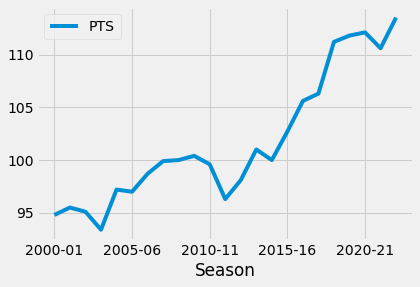

In [148]:
NBAdf.plot("Season", "PTS")

<AxesSubplot:xlabel='Season'>

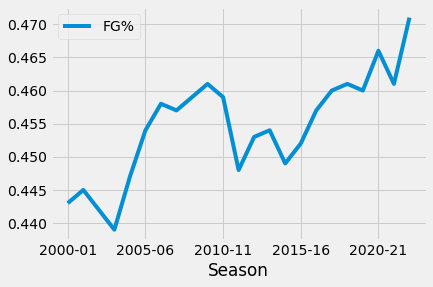

In [149]:
NBAdf.plot("Season", "FG%")

<AxesSubplot:xlabel='Season'>

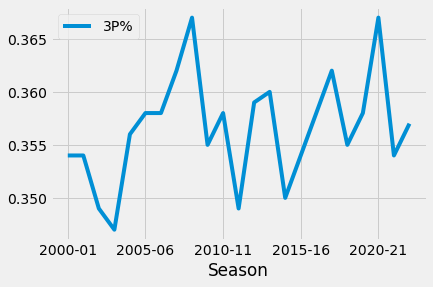

In [150]:
NBAdf.plot("Season", "3P%")

<AxesSubplot:xlabel='Season'>

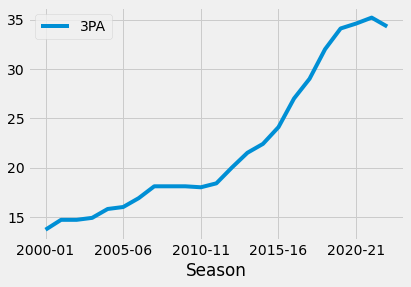

In [151]:
NBAdf.plot("Season", "3PA")

<AxesSubplot:xlabel='Season'>

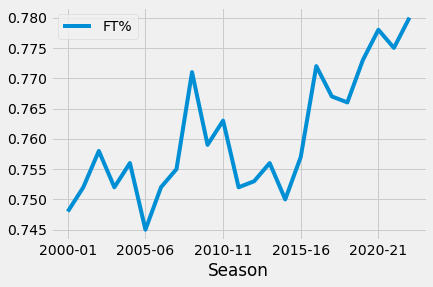

In [152]:
NBAdf.plot("Season", "FT%")

<AxesSubplot:xlabel='Season'>

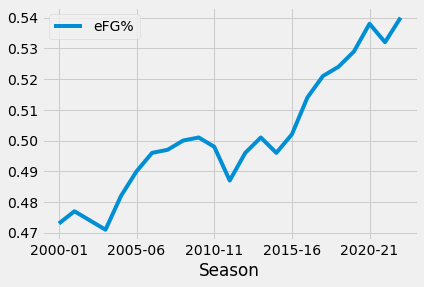

In [153]:
NBAdf.plot("Season", "eFG%")

<AxesSubplot:xlabel='Season'>

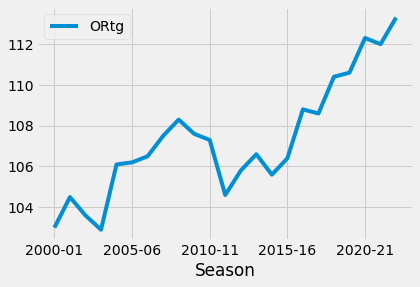

In [154]:
NBAdf.plot("Season", "ORtg")